# 01 - Data Exploration
## Risk Parity Portfolio Project

**Objective**: Load and explore market data (Yahoo Finance) and macroeconomic indicators (FRED)

### Sections:
1. Load market data (SPY, TLT, GLD, DBC, VNQ)
2. Load FRED macro data (CPI, Federal Funds, 10Y, Recession)
3. Visualize price history
4. Calculate basic statistics

In [1]:
# Imports
import sys
sys.path.append('/src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import DataLoader
from src.visualization import PortfolioVisualizer

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('dark_background')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\rfull\AppData\Roaming\Python\Python312\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rfull\AppData\Roaming\Python\Python312\site-packages\pandas\core\arrays\masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.7' currently installed).
  from pandas.core import (


## 1. Load Market Data

In [3]:
# FRED API Intializer
loader = DataLoader(fred_api_key="9fb3507ccba20e766e4972a45c57c18c")

# Pull full crisis history
prices = loader.fetch_market_data(start_date="2007-01-01")

# Convert to returns
returns = loader.compute_returns(prices)

returns.head()

📊 Fetching market data from FRED...
   ✓ Stocks (SP500): 2609 records
   ✓ Bonds (DGS10): 4980 records
   ✗ Failed Gold: Bad Request.  The series does not exist.
   ✓ Commodities (PALLFNFINDEXQ): 76 records

✅ Market data loaded: (2567, 3)
   Date range: 2016-04-01 → 2026-02-02

💾 Data saved → ../data/raw_prices.csv

🔄 Computing asset returns...
✅ Returns computed: (2566, 3)


,Stocks,Bonds,Commodities
2016-04-04,-0.003208,0.00085,0.0
2016-04-05,-0.010145,0.00425,0.0
2016-04-06,0.010508,-0.00255,0.0
2016-04-07,-0.011976,0.00510,0.0
2016-04-08,0.002787,-0.00170,0.0


In [5]:
# Display first few rows
print("\n📊 Price Data Sample:")
prices.head(10)


📊 Price Data Sample:


,Stocks,Bonds,Commodities
2016-04-01,2072.78,1.79,100.428444
2016-04-04,2066.13,1.78,100.428444
2016-04-05,2045.17,1.73,100.428444
2016-04-06,2066.66,1.76,100.428444
2016-04-07,2041.91,1.70,100.428444
2016-04-08,2047.60,1.72,100.428444
2016-04-11,2041.99,1.73,100.428444
2016-04-12,2061.72,1.79,100.428444
2016-04-13,2082.42,1.77,100.428444
2016-04-14,2082.78,1.80,100.428444


In [7]:
# Basic statistics
print("\n📈 Price Statistics:")
prices.describe()


📈 Price Statistics:


,Stocks,Bonds,Commodities
count,2567.000000,2567.000000,2567.000000
mean,3846.243814,2.731153,151.067315
std,1303.910315,1.184700,45.320979
min,2000.540000,0.520000,92.218000
25%,2743.470000,1.730000,107.383610
50%,3785.380000,2.650000,138.650611
75%,4554.935000,3.920000,170.724070
max,6978.600000,4.980000,230.475777


## 2. Load Macroeconomic Data

In [10]:
# Fetch FRED macro data
macro = loader.fetch_macro_data()


📈 Fetching macroeconomic data from FRED...
   ✓ CPI (CPIAUCSL): 228 records
   ✓ FedFunds (FEDFUNDS): 229 records
   ✓ YieldCurve (T10Y2Y): 4981 records
   ✓ Recession (USREC): 229 records

✅ Macro data loaded: (227, 4)


In [11]:
# Display macro data
print("\n📊 Macro Data Sample:")
macro.tail(20)


📊 Macro Data Sample:


,CPI,FedFunds,YieldCurve,Recession
2024-05-01,313.140,5.33,-0.33,0.0
2024-06-01,313.131,5.33,-0.33,0.0
2024-07-01,313.566,5.33,-0.29,0.0
2024-08-01,314.131,5.33,-0.17,0.0
2024-09-01,314.851,5.13,-0.17,0.0
2024-10-01,315.564,4.83,0.13,0.0
2024-11-01,316.449,4.64,0.16,0.0
2024-12-01,317.603,4.48,0.16,0.0
2025-01-01,319.086,4.33,0.16,0.0
2025-02-01,319.775,4.33,0.16,0.0


## 3. Visualize Price History

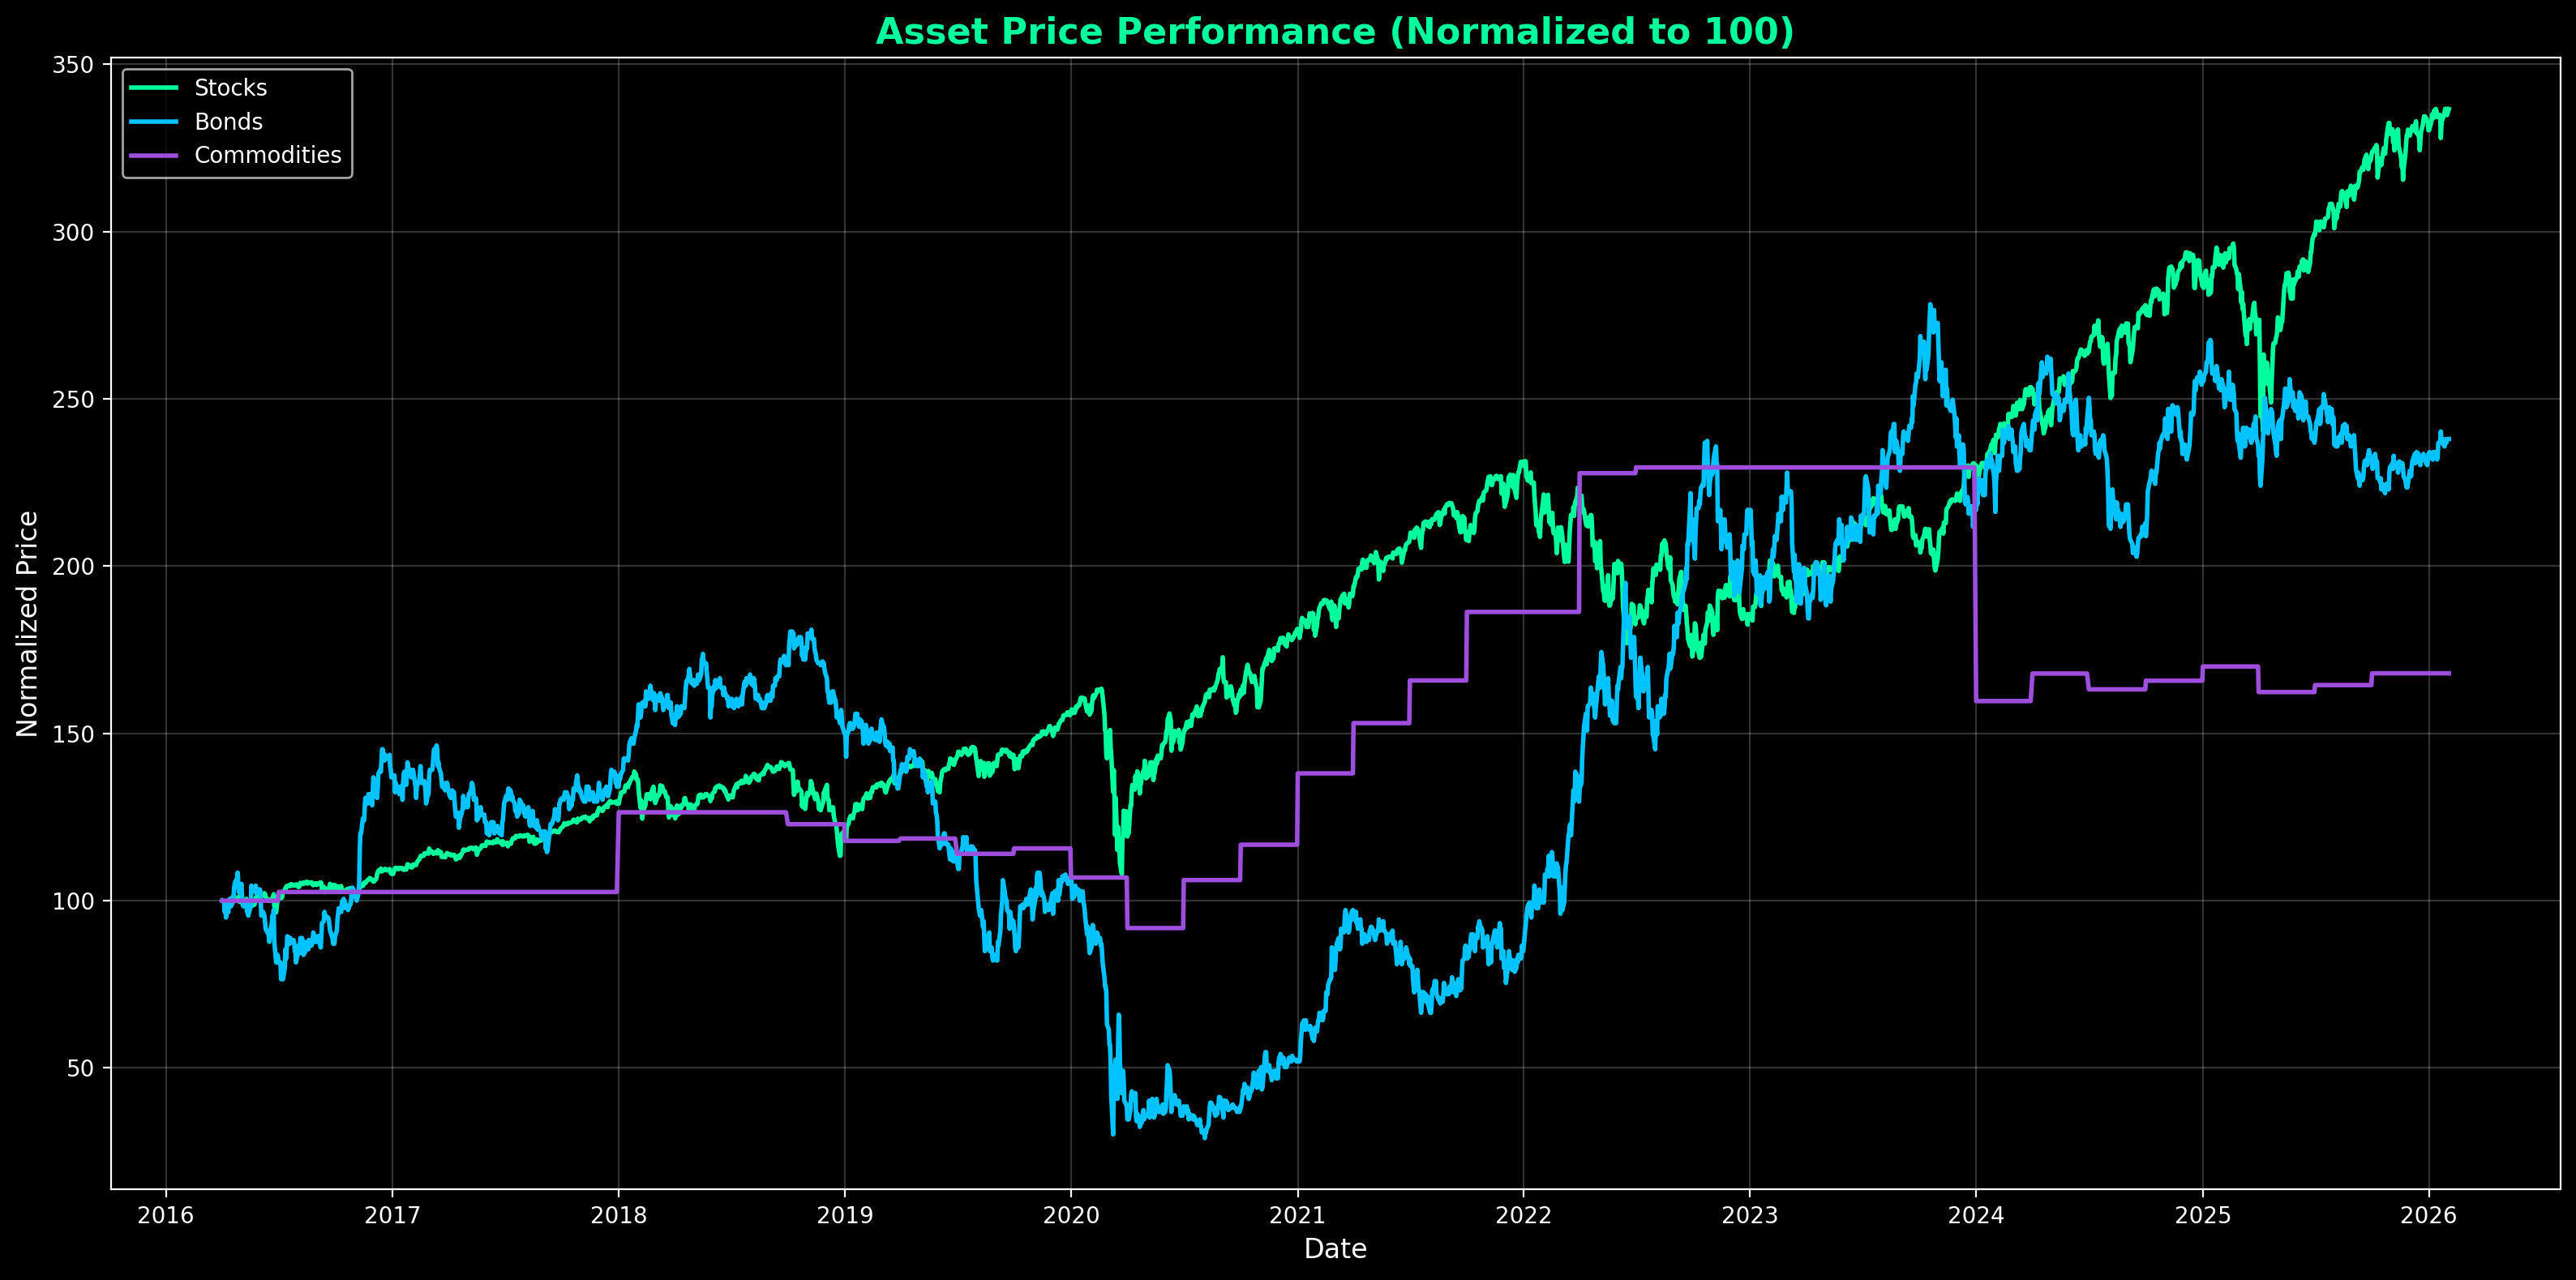

In [13]:
# Plot normalized price history
viz = PortfolioVisualizer()
fig = viz.plot_price_history(prices, figsize=(16, 8))
plt.show()

## 4. Calculate Returns

In [15]:
# Calculate log returns
from risk_models import RiskModels

returns = RiskModels.calculate_returns(prices, method='log')

print("\n📊 Returns Statistics:")
print(f"Shape: {returns.shape}")
print(f"\nAnnualized Returns:")
print((returns.mean() * 252).round(4))
print(f"\nAnnualized Volatility:")
print((returns.std() * np.sqrt(252)).round(4))

ModuleNotFoundError: No module named 'risk_models'

## 5. Returns Distribution

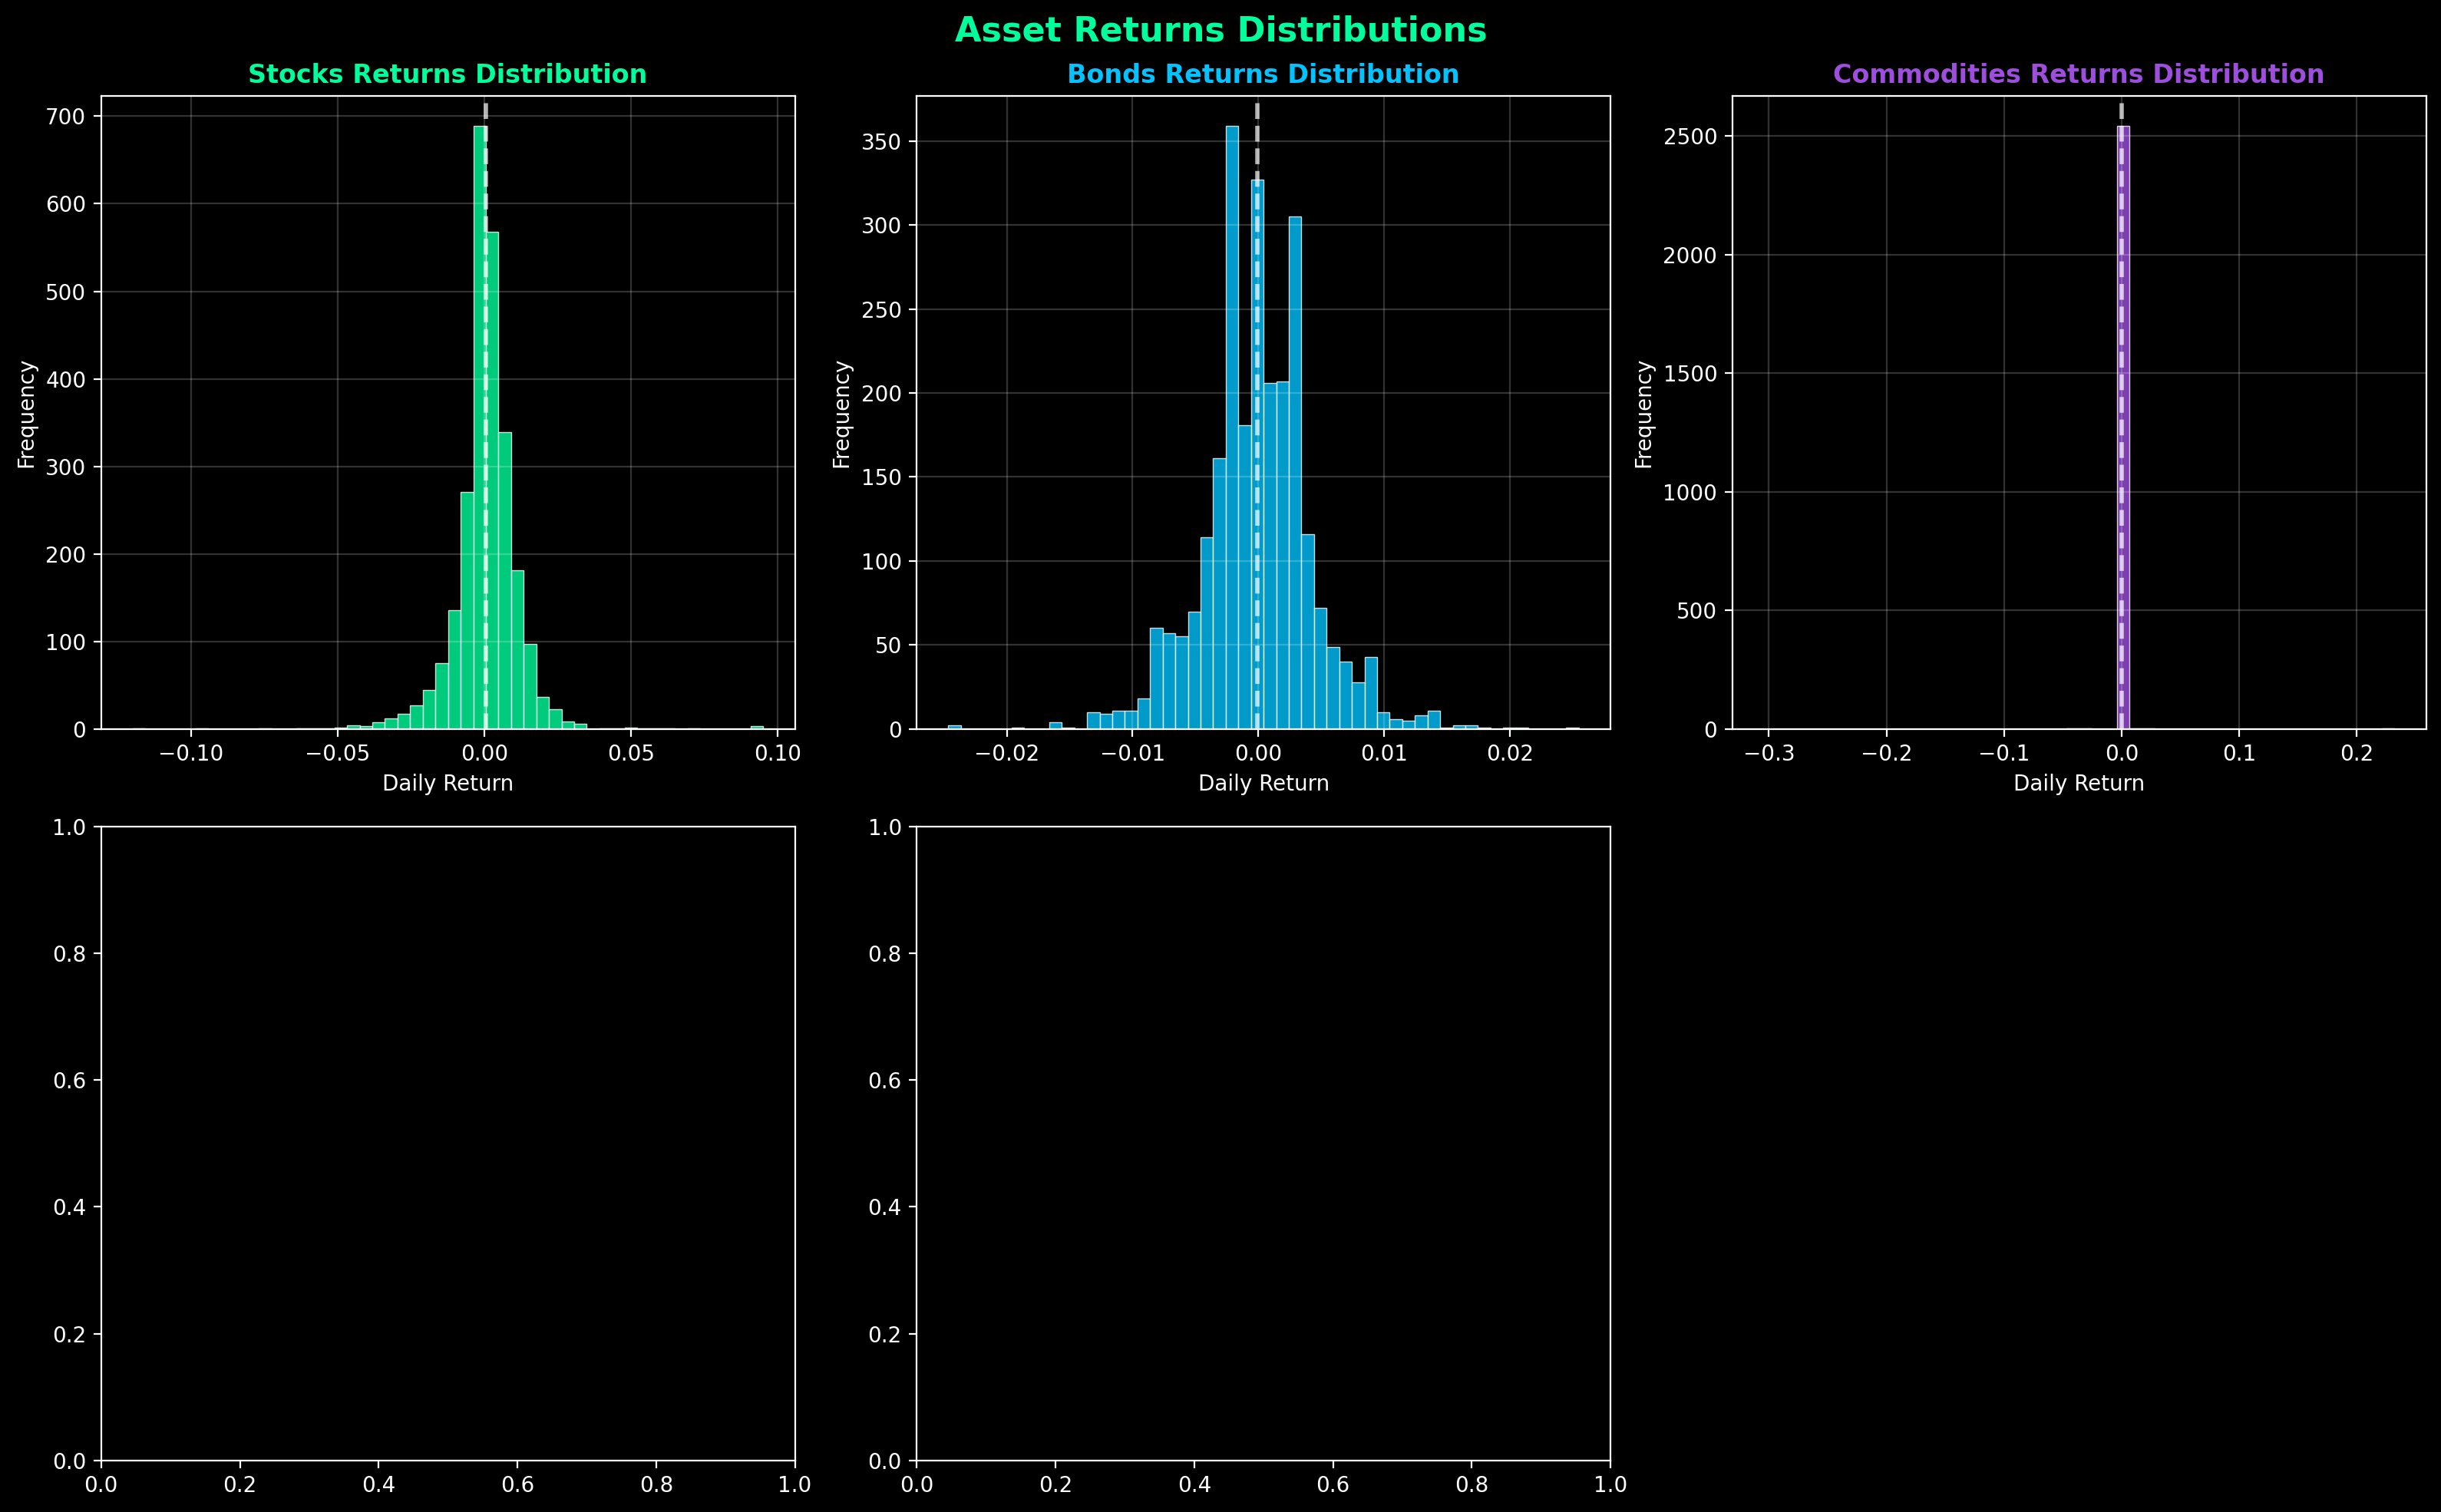

In [16]:
# Plot returns distribution
STONKS_GREEN = '#00ff9c'
STONKS_PALETTE = ['#00ff9c', '#00c3ff', '#9d4edd', '#ffbe0b', '#fb5607']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(returns.columns):
    ax = axes[i]
    ax.hist(returns[col], bins=50, alpha=0.8, 
            color=STONKS_PALETTE[i], edgecolor='white', linewidth=0.5)
    ax.set_title(f'{col} Returns Distribution', 
                fontsize=12, fontweight='bold', color=STONKS_PALETTE[i])
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.2)
    
    # Add mean line
    ax.axvline(returns[col].mean(), color='white', 
              linestyle='--', linewidth=2, alpha=0.7)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Asset Returns Distributions', 
            fontsize=16, fontweight='bold', color=STONKS_GREEN)
plt.tight_layout()
plt.show()

## 6. Save Data

In [18]:
# Save to CSV for use in other notebooks
loader.save_data(prices, '../data/raw_prices.csv')

# Also save returns
returns.to_csv('../data/returns.csv')
print("✅ Data saved successfully!")


💾 Data saved → ../data/raw_prices.csv
✅ Data saved successfully!


## Summary

**Key Findings**:
- Loaded 5 asset classes with historical data from 2007
- Captures major market events: GFC (2008-09), COVID (2020), Inflation shock (2022)
- Asset returns show varying volatility profiles
- Ready for volatility estimation and portfolio optimization

**Next Steps**:
- Notebook 02: Estimate rolling volatility
- Notebook 03: Optimize risk parity portfolio